# Detrending & Decomposition

<b>Trendbereinigung der Zeitreihe (Detrending) </b>
* Transformationen: Log Transformation, Square Root Transformation, Cubed Root Transformation
* Gleitender Durchschnitt zur Glättung der Zeitreihe
* Differenzierung der Zeitreihe

<b>Zerlegung der Zeitreihe (Decomposition) </b>
* additive Zerlegung
* multiplikative Zerlegung

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel("kijangemas_quelle.xlsx")
df

,Date,1 oz Sell,1 oz Buy,1/2 oz Sell,1/2 oz Buy,1/4 oz Sell,1/4 oz Buy
0,2018-01-03,5632.0,5415.0,2869.0,2708.0,1461.0,1354.0
1,2018-01-04,5579.0,5362.0,2842.0,2681.0,1447.0,1341.0
2,2018-01-05,5608.0,5391.0,2857.0,2696.0,1455.0,1348.0
3,2018-01-08,5585.0,5371.0,2845.0,2685.0,1449.0,1343.0
4,2018-01-09,5592.0,5377.0,2849.0,2688.0,1451.0,1344.0
...,...,...,...,...,...,...,...
684,2020-10-23,8372.0,8047.0,4265.0,4023.0,2172.0,2012.0
685,2020-10-26,8386.0,8044.0,4272.0,4022.0,2176.0,2011.0
686,2020-10-27,8413.0,8086.0,4286.0,4043.0,2183.0,2021.0
687,2020-10-28,8424.0,8087.0,4292.0,4043.0,2186.0,2022.0


In [3]:
timestamp, selling = [], []  
timestamp = pd.DatetimeIndex(df['Date']).date
selling = df["1 oz Sell"]
len(timestamp), len(selling)

(689, 689)

In [4]:
dfges = pd.DataFrame({'timestamp': timestamp, 'selling': selling})
dfges

,timestamp,selling
0,2018-01-03,5632.0
1,2018-01-04,5579.0
2,2018-01-05,5608.0
3,2018-01-08,5585.0
4,2018-01-09,5592.0
...,...,...
684,2020-10-23,8372.0
685,2020-10-26,8386.0
686,2020-10-27,8413.0
687,2020-10-28,8424.0


In [5]:
from statsmodels.tsa.stattools import adfuller

def ADF_Test(time_series):
    result = adfuller(time_series, autolag = 'AIC')
    print('\033[01m' + '\033[04m' + 'Augmented Dicky-Fuller Test' + '\033[0m')
    labels = ['ADF Test Statistics', 'p-value', '# Lags used', '# Observations used']
    
    for value, label in zip(result, labels):
        print(label + ': ' + str(value))
   
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.4f' % (key, value))
        
    if result[1] <= 0.05:
        print('\033[01m' + '\033[91m' + 'Reject the null hypothesis!' + '\033[0m')
        print('Data has no unit root and the time series is stationary.')
    else:
        print('\033[01m' + '\033[91m' + "Fail to reject the null hypothesis!" + '\033[0m')
        print('Data has a unit root and the time series is non-stationary.')

In [6]:
ADF_Test(dfges['selling'])

Augmented Dicky-Fuller Test
ADF Test Statistics: 0.3488041932349406
p-value: 0.9794760761399782
# Lags used: 16
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.


In [7]:
df3 = dfges.set_index('timestamp')
df3.head()

,selling
timestamp,
2018-01-03,5632.0
2018-01-04,5579.0
2018-01-05,5608.0
2018-01-08,5585.0
2018-01-09,5592.0


In [8]:
# Berechne den Logarithmus der Verkaufspreise
df3['selling_log'] = np.log(df3['selling'])

# Berechne die Quadratwurzel der Verkaufspreise
df3['selling_sqrt'] = np.sqrt(df3['selling'])

# Berechne die dritte Wurzel der Verkaufspreise
df3['selling_cbrt'] = np.cbrt(df3['selling'])

df3.head()

,selling,selling_log,selling_sqrt,selling_cbrt
timestamp,,,,
2018-01-03,5632.0,8.636220,75.046652,17.791841
2018-01-04,5579.0,8.626765,74.692704,17.735855
2018-01-05,5608.0,8.631949,74.886581,17.766532
2018-01-08,5585.0,8.627840,74.732858,17.742210
2018-01-09,5592.0,8.629092,74.779676,17.749620


<h1 style="color:Tomato;">Transformations</h1>

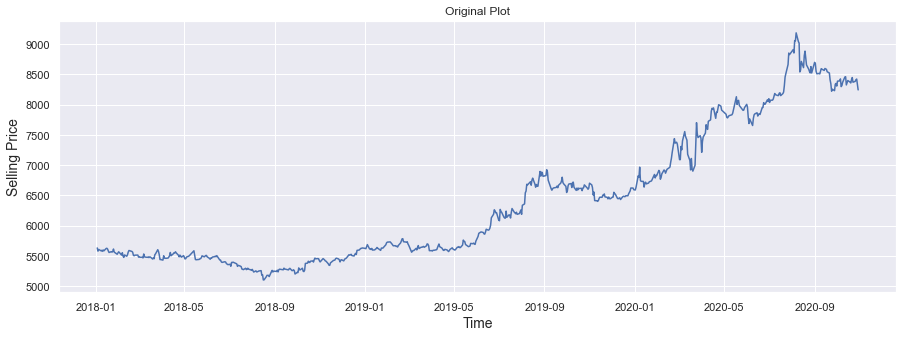

In [9]:
df3['selling'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Selling Price", fontsize = 14)
plt.title("Original Plot")
plt.show()

<h2>Log Transformation</h2>

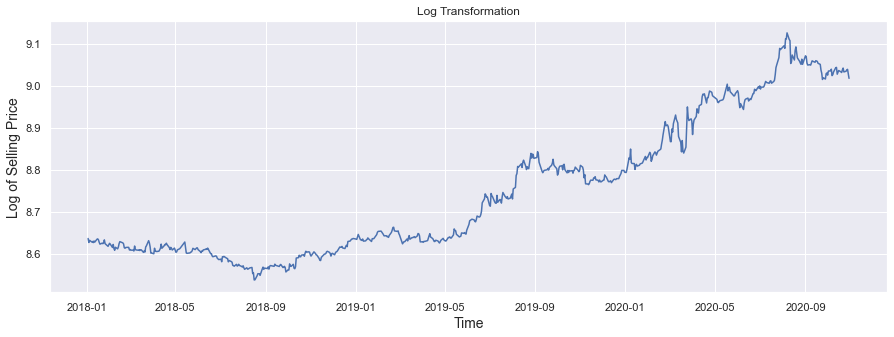

In [10]:
df3['selling_log'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Log of Selling Price", fontsize = 14)
plt.title("Log Transformation")
plt.show()

<h2>Square Root Transformation</h2>

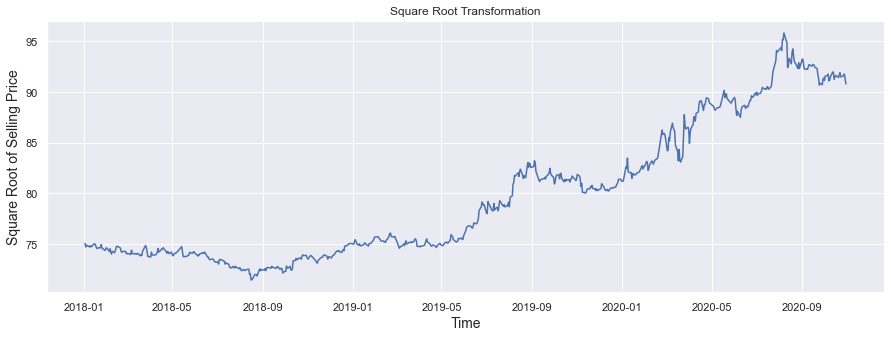

In [11]:
df3['selling_sqrt'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Square Root of Selling Price", fontsize = 14)
plt.title("Square Root Transformation")
plt.show()

<h2>Cubed Root Transformation</h2>

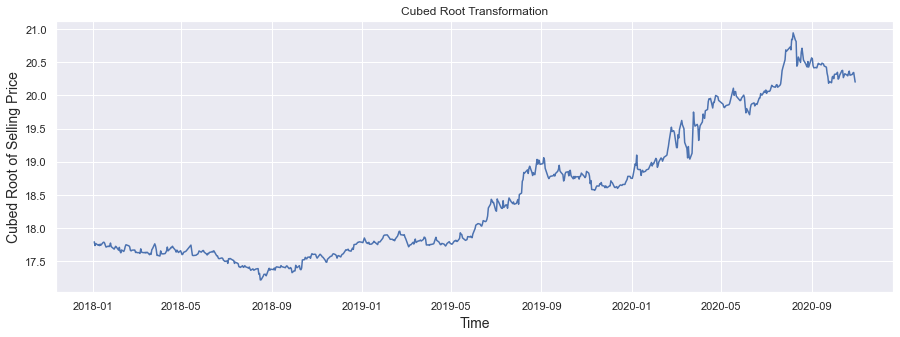

In [12]:
df3['selling_cbrt'].plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Cubed Root of Selling Price", fontsize = 14)
plt.title("Cubed Root Transformation")
plt.show()

<h1 style="color:Tomato;">Subtracting The Rolling Mean From The Original</h1>

<h2>Einfacher gleitender Durchschnitt / Removing The Simple Rolling Mean </h2>

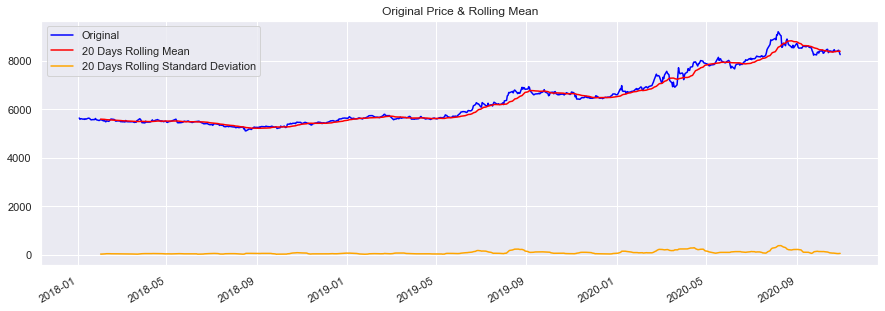

In [13]:
rolmean = df3['selling'].rolling(window = 20).mean()
rolstd = df3['selling'].rolling(window = 20).std()

fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(df3['selling'], color = 'blue', label = 'Original')
ax.plot(rolmean, color = 'red', label = '20 Days Rolling Mean')
ax.plot(rolstd, color = 'orange', label = '20 Days Rolling Standard Deviation')
ax.legend(loc = 'best')
plt.title('Original Price & Rolling Mean')
fig.autofmt_xdate()
plt.show(block = False)

In [14]:
# Subtrahiere den einfachen gleitenden Durchschnitt von den Originaldaten und überprüfe auf NaNs
data_minus_rolmean = df3['selling'] - rolmean
data_minus_rolmean[15:25]

timestamp
2018-01-24      NaN
2018-01-25      NaN
2018-01-26      NaN
2018-01-30      NaN
2018-02-01   -18.90
2018-02-02   -26.15
2018-02-05   -66.85
2018-02-06   -24.10
2018-02-07   -75.70
2018-02-08   -90.90
Name: selling, dtype: float64

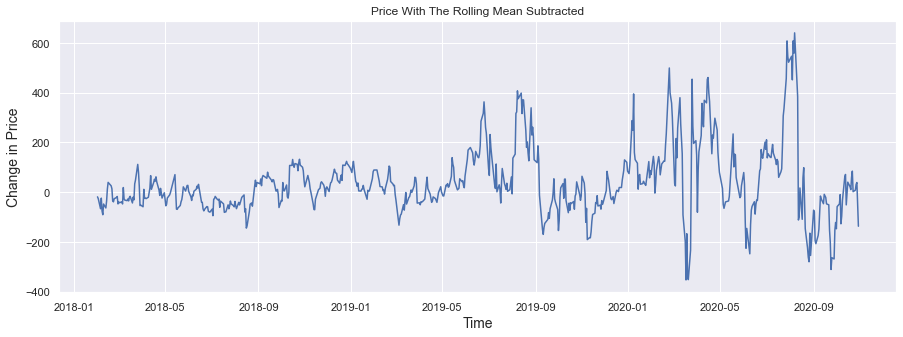

In [15]:
# Lösche die NaNs aus der oben berechneten Zeitreihe
data_minus_rolmean.dropna(inplace = True)

data_minus_rolmean.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Change in Price", fontsize = 14)
plt.title("Price With The Rolling Mean Subtracted")
plt.show()

Diese Zeitreihe scheint stationärer zu sein. Der Aufwärtstrend ist praktisch verschwunden, aber die Varianz ist immer noch offensichtlich.

In [16]:
ADF_Test(data_minus_rolmean)

Augmented Dicky-Fuller Test
ADF Test Statistics: -4.88060698523611
p-value: 3.8035775411477395e-05
# Lags used: 16
# Observations used: 653
Critical Values:
	1%: -3.4404
	5%: -2.8660
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


<h2>Gewichteter gleitender Durchschnitt / Removing The Weighted Rolling Mean</h2>

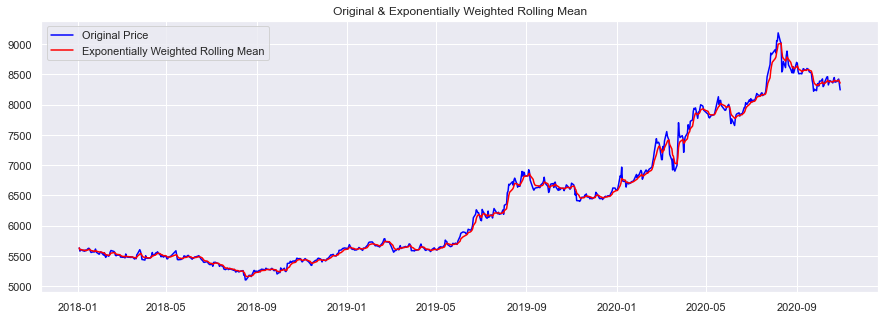

In [17]:
# Exponentiell geglätteter Durchschnitt / Exponentially Weighted Moving Average (EWMA)
exp_rolmean = df3['selling'].ewm(halflife = 2).mean()

fig, ax = plt.subplots(figsize = (15, 5))
orig = plt.plot(df3['selling'], color = 'blue', label = 'Original Price')
mean = plt.plot(exp_rolmean, color = 'red', label = 'Exponentially Weighted Rolling Mean')
plt.legend(loc = 'best')
plt.title('Original & Exponentially Weighted Rolling Mean')
plt.show(block = False)

In [18]:
# Subtrahiere den EWMA von den Originaldaten und überprüfe auf NaNs
data_minus_exp_rolmean = df3['selling'] - exp_rolmean
data_minus_exp_rolmean.head(15)

timestamp
2018-01-03     0.000000
2018-01-04   -21.953319
2018-01-05     3.853958
2018-01-08   -11.669048
2018-01-09    -3.007855
2018-01-10   -11.979994
2018-01-11     6.800662
2018-01-12    -5.637706
2018-01-15    22.445326
2018-01-16    19.147468
2018-01-17     4.306230
2018-01-18   -19.453701
2018-01-19   -31.288052
2018-01-22   -12.889429
2018-01-23   -14.031590
Name: selling, dtype: float64

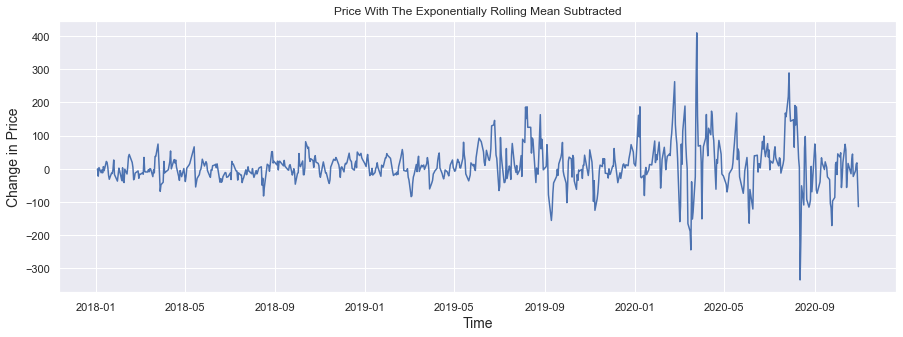

In [19]:
data_minus_exp_rolmean.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Change in Price", fontsize = 14)
plt.title("Price With The Exponentially Rolling Mean Subtracted")
plt.show()

In [20]:
ADF_Test(data_minus_exp_rolmean)

Augmented Dicky-Fuller Test
ADF Test Statistics: -5.817201994821855
p-value: 4.264974738911892e-07
# Lags used: 16
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


<h1 style="color:Tomato;">Differencing</h1>

In [21]:
data_diff = df3['selling'].diff(periods = 1) # data_diff = df3['selling'] - df3['selling'].shift(1)
data_diff.head(10)

timestamp
2018-01-03     NaN
2018-01-04   -53.0
2018-01-05    29.0
2018-01-08   -23.0
2018-01-09     7.0
2018-01-10   -15.0
2018-01-11    22.0
2018-01-12   -15.0
2018-01-15    38.0
2018-01-16     5.0
Name: selling, dtype: float64

In [22]:
data_diff.dropna(inplace = True)
data_diff.head(10)

timestamp
2018-01-04   -53.0
2018-01-05    29.0
2018-01-08   -23.0
2018-01-09     7.0
2018-01-10   -15.0
2018-01-11    22.0
2018-01-12   -15.0
2018-01-15    38.0
2018-01-16     5.0
2018-01-17   -13.0
Name: selling, dtype: float64

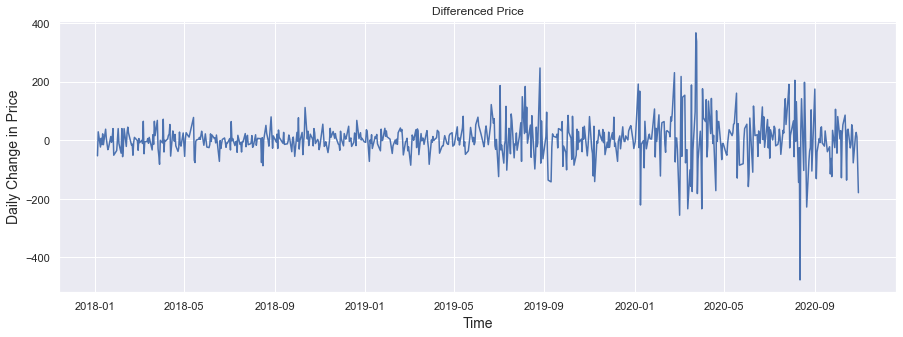

In [23]:
data_diff.plot(figsize = (15, 5))
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Daily Change in Price", fontsize = 14)
plt.title('Differenced Price')
plt.show(block = False)

Die Differenzierung beseitigte auch den Aufwärtstrend der Ursprungszeitreihe, die Varianz ist allerdings immer noch zeitabhängig.

In [24]:
ADF_Test(data_diff)

Augmented Dicky-Fuller Test
ADF Test Statistics: -6.676318614963384
p-value: 4.455910123839533e-09
# Lags used: 15
# Observations used: 672
Critical Values:
	1%: -3.4401
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


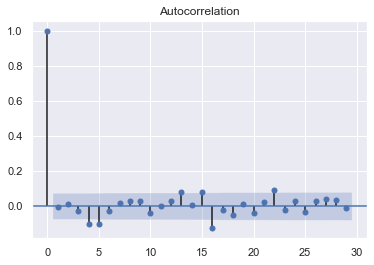

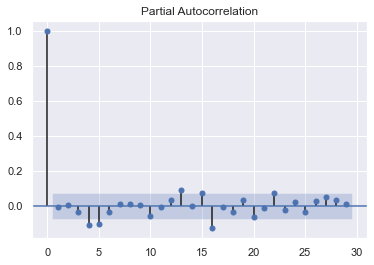

In [25]:
# Autokovarianzfunktion & Partielle Autokorrelationsfunktion der differenzierten Reihe
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plot_pacf(data_diff);

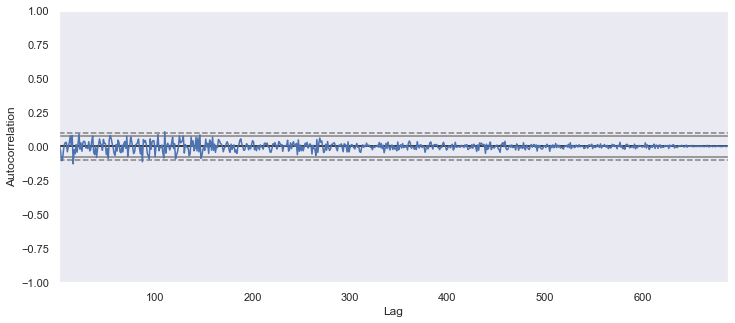

In [26]:
from pandas.plotting import autocorrelation_plot
fig = plt.figure(figsize = (12, 5))
autocorrelation_plot(data_diff)
plt.show()

<h1 style="color:Tomato;">Time Series Decomposition / Zerlegung von Zeitreihen</h1>

Bei der Zeitreihenzerlegung wird eine Zeitreihe $X_t$ in 3 Kernkomponenten aufgeteilt: $X_t=f(T_t,S_t,\epsilon_t)$
* $T_t$: Trend-Zyklus (Anstieg oder Abfall)
* $S_t$: saisonale Komponente (ein wiederkehrender Zyklus)
* $\epsilon_t$: irreguläre Komponente (die verbleibenden zufälligen Residuen)

Die Funktion $f()$ kann eine Summe oder Produkt sein:
* additive Zerlegung: $X_t=T_t+S_t+\epsilon_t$
* multiplikative Zerlegung: $X_t=T_t\cdot S_t\cdot\epsilon_t$

3 Frequenzen werden für die Zeitreihendaten getestet: period = 5, period = 20 und period = 240, wobei 
* 5 $\approx$ Anzahl der Handelstage pro Woche 
* 20 $\approx$ Anzahl der Handelstage pro Monat
* 240 $\approx$ Anzahl der Handelstage pro Jahr 

<h2> Additive Decomposition</h2>

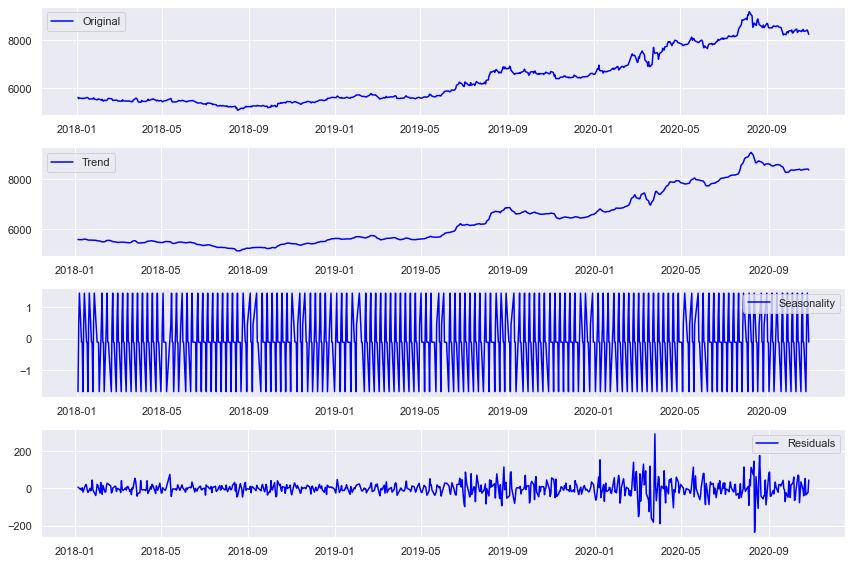

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# period = 5
AdditiveDecomposition = seasonal_decompose(df3['selling'], model = 'additive', period = 5)
trend = AdditiveDecomposition.trend
seasonal = AdditiveDecomposition.seasonal
residual = AdditiveDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(df3['selling'], label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

# Shorter: AdditiveDecomposition.plot().set_size_inches(12, 8)

In [28]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -10.093527355830718
p-value: 1.1060843817428051e-17
# Lags used: 19
# Observations used: 665
Critical Values:
	1%: -3.4402
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


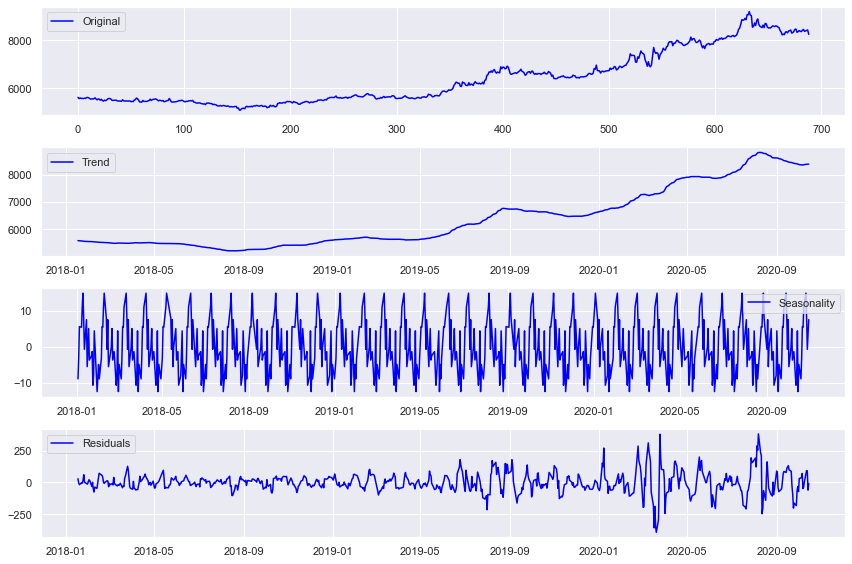

In [29]:
# period = 20
AdditiveDecomposition = seasonal_decompose(df3['selling'], model = 'additive', period = 20)
trend = AdditiveDecomposition.trend
seasonal = AdditiveDecomposition.seasonal
residual = AdditiveDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(selling, label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

In [30]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -9.053985999703437
p-value: 4.755968571612477e-15
# Lags used: 19
# Observations used: 649
Critical Values:
	1%: -3.4405
	5%: -2.8660
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


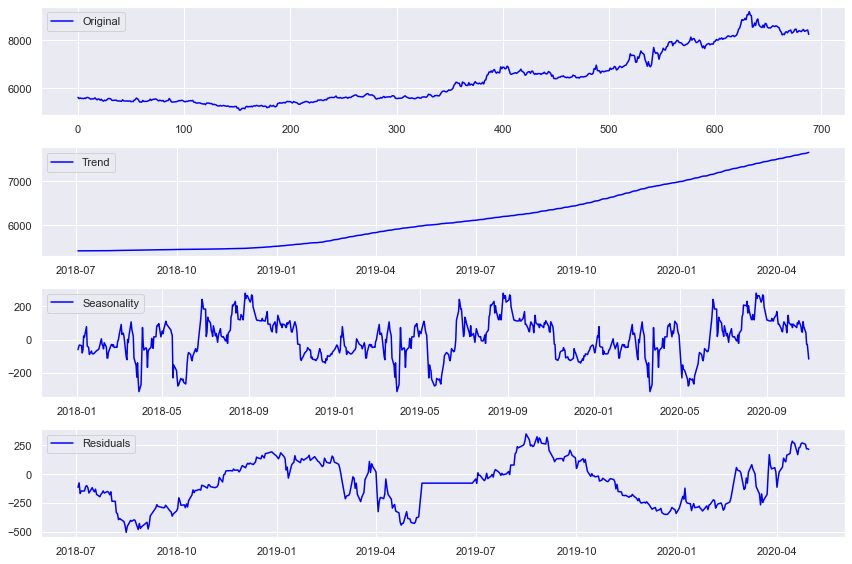

In [31]:
# period = 240
AdditiveDecomposition = seasonal_decompose(df3['selling'], model = 'additive', period = 240)
trend = AdditiveDecomposition.trend
seasonal = AdditiveDecomposition.seasonal
residual = AdditiveDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(selling, label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

In [32]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -2.177359113685779
p-value: 0.21456516143943738
# Lags used: 16
# Observations used: 432
Critical Values:
	1%: -3.4456
	5%: -2.8683
	10%: -2.5703
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.


<h2> Multiplicative Decomposition</h2>

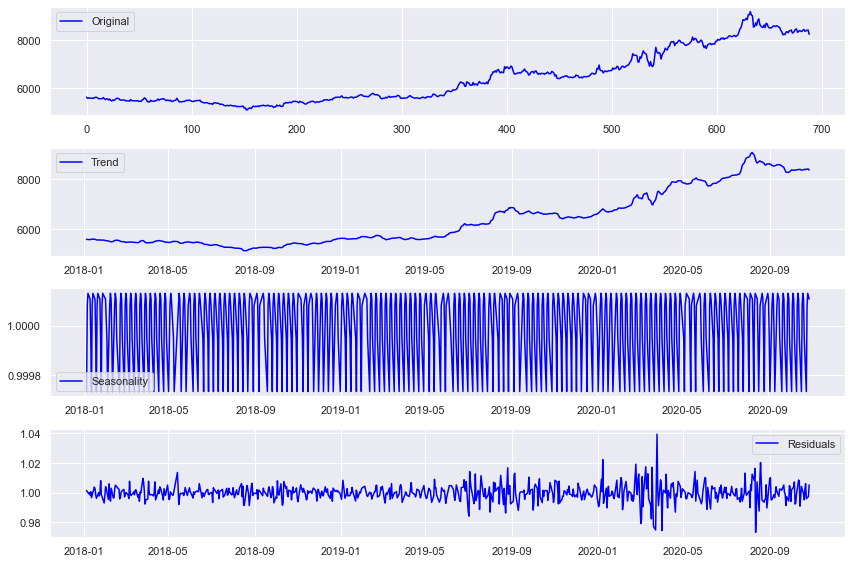

In [33]:
# period = 5
MultiplicativeDecomposition = seasonal_decompose(df3['selling'], model = 'multiplicative', period = 5)
trend = MultiplicativeDecomposition.trend
seasonal = MultiplicativeDecomposition.seasonal
residual = MultiplicativeDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(selling, label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

In [34]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -9.90449149519488
p-value: 3.2909719209270736e-17
# Lags used: 20
# Observations used: 664
Critical Values:
	1%: -3.4402
	5%: -2.8659
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


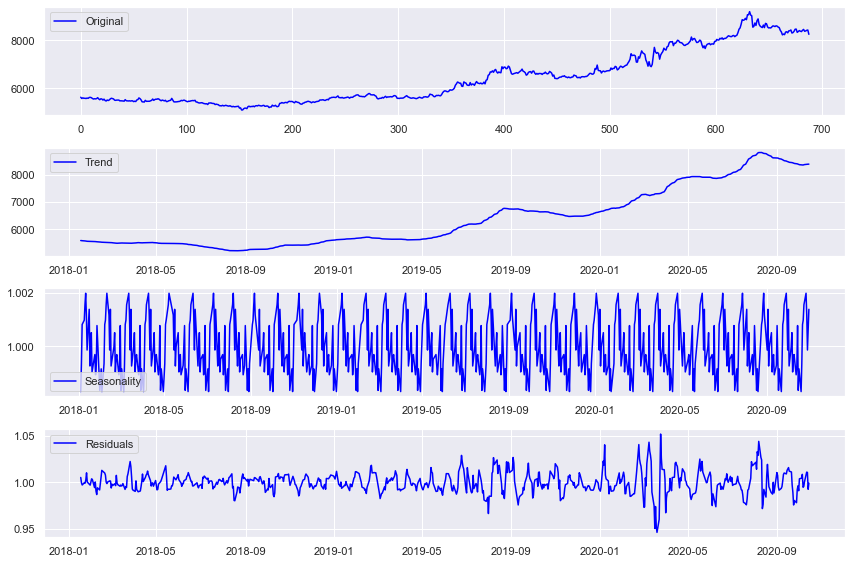

In [35]:
# period = 20
MultiplicativeDecomposition = seasonal_decompose(df3['selling'], model = 'multiplicative', period = 20)
trend = MultiplicativeDecomposition.trend
seasonal = MultiplicativeDecomposition.seasonal
residual = MultiplicativeDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(selling, label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

In [36]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -9.055524964384889
p-value: 4.7130597624949266e-15
# Lags used: 19
# Observations used: 649
Critical Values:
	1%: -3.4405
	5%: -2.8660
	10%: -2.5691
Reject the null hypothesis!
Data has no unit root and the time series is stationary.


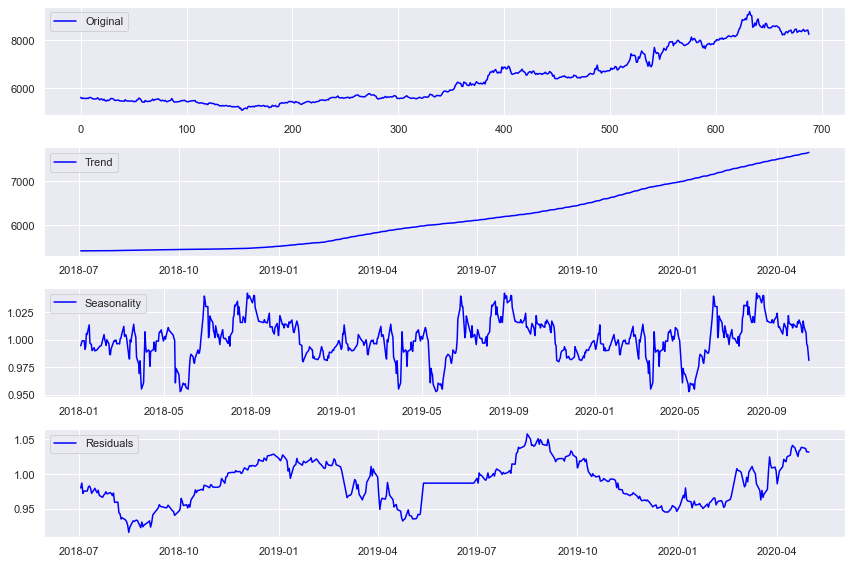

In [37]:
# period = 240
MultiplicativeDecomposition = seasonal_decompose(df3['selling'], model = 'multiplicative', period = 240)
trend = MultiplicativeDecomposition.trend
seasonal = MultiplicativeDecomposition.seasonal
residual = MultiplicativeDecomposition.resid

plt.figure(figsize = (12, 8))
plt.subplot(411)
plt.plot(selling, label = 'Original', color = "blue")
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = "blue")
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality', color = "blue")
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals', color = "blue")
plt.legend(loc = 'best')
plt.tight_layout()

In [38]:
residual.dropna(inplace = True)
ADF_Test(residual)

Augmented Dicky-Fuller Test
ADF Test Statistics: -2.1152371403290227
p-value: 0.238431974637552
# Lags used: 16
# Observations used: 432
Critical Values:
	1%: -3.4456
	5%: -2.8683
	10%: -2.5703
Fail to reject the null hypothesis!
Data has a unit root and the time series is non-stationary.
